In [197]:
import os
import gzip
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [198]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [199]:
def get_data(X_arr, y_arr):
    class_5 = list(np.where(y_arr == 5))
    class_7 = list(np.where(y_arr == 7))

    temp = list(class_5[0])
    for item in list(class_7[0]):
        temp.append(item)

    temp_indices = np.array(temp)
    indices_to_keep = np.sort(temp_indices)

    accessed_mapping = map(list(X_arr).__getitem__, indices_to_keep)
    new_x_arr = list(accessed_mapping)

    accessed_mapping = map(list(y_arr).__getitem__, indices_to_keep)
    new_y_arr = list(accessed_mapping)

    return new_x_arr,new_y_arr

X_train, y_train = load_mnist('data/fashion/', kind='train')
X_test, y_test = load_mnist('data/fashion/', kind='t10k')

temp_X_train,temp_y_train = get_data(X_train,y_train)
temp_X_test,temp_y_test = get_data(X_test,y_test)

new_X_train = [item / 255 for item in temp_X_train[:len(temp_X_train)//2]]
new_X_test = [item / 255 for item in temp_X_test[:len(temp_X_test)//2]]

new_y_train = temp_y_train[:len(temp_y_train)//2]
new_y_test = temp_y_test[:len(temp_y_test)//2]

# print(len(new_X_train))
# print(len(new_y_train))
# print(len(new_X_test))
# print(len(new_y_test))



## Linear Regression

In [200]:
def regression_experiments(train,test,regularization):
    clf = LogisticRegression(max_iter=100000,C=regularization,penalty='l2',multi_class='multinomial').fit(new_X_train, new_y_train)
    train[regularization] = clf.score(new_X_train, new_y_train)
    test[regularization] = clf.score(new_X_test, new_y_test)

# C0 = 0.05, alpha = 1.5
logarithmic_regularization = [0.05,0.07500000000000001,0.1125,0.16875,0.253125,0.3796875,0.56953125,
                            0.8542968750000001,1.2814453125,1.9221679687500002] 
train_reg,test_reg = {},{}
for item in logarithmic_regularization:
    regression_experiments(train_reg,test_reg,item)


Accuracy on training set
	Min accuracy is 0.964444 with regularization parameter of 0.050000
	Max accuracy is 0.980000 with regularization parameter of 1.922168
	Average accuracy: 0.9728333333333333

Accuracy on validation set
	Min accuracy is 0.954000 with regularization parameter of 1.922168
	Max accuracy is 0.966000 with regularization parameter of 0.168750
	Average accuracy: 0.9606


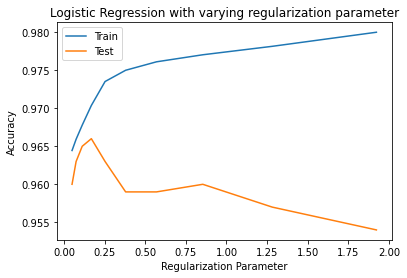

In [236]:
print("Accuracy on training set")
print("\tMin accuracy is %f with regularization parameter of %f" % (min(train_reg.values()),list(train_reg.keys())[list(train_reg.values()).index(min(train_reg.values()))]))
print("\tMax accuracy is %f with regularization parameter of %f" % (max(train_reg.values()),list(train_reg.keys())[list(train_reg.values()).index(max(train_reg.values()))]))
print("\tAverage accuracy:", sum(list(train_reg.values()))/len(list(train_reg.values())))

print("\nAccuracy on validation set")
print("\tMin accuracy is %f with regularization parameter of %f" % (min(test_reg.values()),list(test_reg.keys())[list(test_reg.values()).index(min(test_reg.values()))]))
print("\tMax accuracy is %f with regularization parameter of %f" % (max(test_reg.values()),list(test_reg.keys())[list(test_reg.values()).index(max(test_reg.values()))]))
print("\tAverage accuracy:", sum(list(test_reg.values()))/len(list(test_reg.values())))

plt.title("Logistic Regression with varying regularization parameter")
plt.xlabel("Regularization Parameter")
plt.ylabel("Accuracy")
plt.plot(list(train_reg.keys()),list(train_reg.values()))   
plt.plot(list(test_reg.keys()),list(test_reg.values()))   
plt.legend(["Train","Test"])
plt.show()

# Support Vector Machine (SVM)

In [238]:
def Vector_Machine(train_dict,test_dict,regularization):
    vec_machine = svm.SVC(kernel='linear',C=regularization)
    vec_machine.fit(new_X_train,new_y_train)
    train_dict[regularization] = vec_machine.score(new_X_train,new_y_train)
    test_dict[regularization] =  vec_machine.score(new_X_test,new_y_test)

train_dict,test_dict = {},{}
c0 = 0.01
alpha = 1.5
logarithmic_regularization = []
for alpha_exponent in range(10):
    r = (alpha ** alpha_exponent) * c0
    logarithmic_regularization.append(r)
    
# C0 = 0.05, alpha = 1.5
# logarithmic_regularization = [0.05,0.07500000000000001,0.1125,0.16875,0.253125,0.3796875,0.56953125,
#                             0.8542968750000001,1.2814453125,1.9221679687500002] 
for item in logarithmic_regularization:
    Vector_Machine(train_dict,test_dict,item)

print(len(train_dict),len(test_dict))

10 10


Accuracy on training set
	Min accuracy is 0.955500 with regularization parameter of 0.010000
	Max accuracy is 0.976500 with regularization parameter of 0.384434
	Average accuracy: 0.9674166666666666

Accuracy on validation set
	Min accuracy is 0.952000 with regularization parameter of 0.010000
	Max accuracy is 0.965000 with regularization parameter of 0.075938
	Average accuracy: 0.9588000000000001


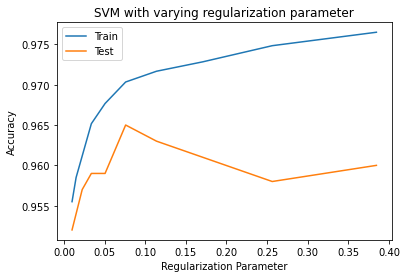

In [240]:
print("Accuracy on training set")
print("\tMin accuracy is %f with regularization parameter of %f" % (min(train_dict.values()),list(train_dict.keys())[list(train_dict.values()).index(min(train_dict.values()))]))
print("\tMax accuracy is %f with regularization parameter of %f" % (max(train_dict.values()),list(train_dict.keys())[list(train_dict.values()).index(max(train_dict.values()))]))
print("\tAverage accuracy:", sum(list(train_dict.values()))/len(list(train_dict.values())))

print("\nAccuracy on validation set")
print("\tMin accuracy is %f with regularization parameter of %f" % (min(test_dict.values()),list(test_dict.keys())[list(test_dict.values()).index(min(test_dict.values()))]))
print("\tMax accuracy is %f with regularization parameter of %f" % (max(test_dict.values()),list(test_dict.keys())[list(test_dict.values()).index(max(test_dict.values()))]))
print("\tAverage accuracy:", sum(list(test_dict.values()))/len(list(test_dict.values())))

plt.title("SVM with varying regularization parameter")
plt.xlabel("Regularization Parameter")
plt.ylabel("Accuracy")
plt.plot(list(train_dict.keys()),list(train_dict.values()))   
plt.plot(list(test_dict.keys()),list(test_dict.values()))   
plt.legend(["Train","Test"])
plt.show()

# K-Fold Cross Validation

In [ ]:
#Credit for code: https://machinelearningmastery.com/implement-resampling-methods-scratch-python/#:~:text=in%20the%20split.-,We%20then%20create,-a%20list%20of
import random 
# splitting data into k-folds
def cross_val(dataset_X,dataset_y,folds):
    data_split_X = list()
    data_split_y = list()
    data_copy_X = list(dataset_X)
    data_copy_y = list(dataset_y)
    fold_len = int(len(dataset_X)/folds)

    for i in range(folds):
        fold_X = list()
        fold_y = list()
        while (len(fold_X) < fold_len) and (len(fold_y) < fold_len):
            ind = random.randrange(len(data_copy_X))
            fold_X.append(data_copy_X.pop(ind))
            fold_y.append(data_copy_y.pop(ind))
        data_split_X.append(fold_X)
        data_split_y.append(fold_y)
    return data_split_X, data_split_y

folds_X,folds_y = cross_val(new_X_train,new_y_train,10)


## K-Fold for logistic Regression
### Finding the best regularization parameter

In [242]:
def regression_experiments_new(train_X,train_y,test_X,test_y,train_reg,validation_reg,regularization):
    clf = LogisticRegression(max_iter=100000,C=regularization,penalty='l2',multi_class='multinomial').fit(train_X, train_y)
    train_reg[regularization] = clf.score(train_X,train_y)
    validation_reg[regularization] = clf.score(test_X,test_y)

def formulate_new_data(validation):
    temp_train_X = folds_X.copy()
    temp_train_X.pop(validation)

    temp_train_y = folds_y.copy()
    temp_train_y.pop(validation)

    k_train_X = sum(temp_train_X, [])
    k_train_y = sum(temp_train_y, [])

    k_test_X = folds_X[validation]
    k_test_y = folds_y[validation]

    return (k_train_X,k_train_y,k_test_X,k_test_y)


validation = random.choice(range(1,11))
train_x,train_y,test_x,test_y = formulate_new_data(validation-1)

# C0 = 0.05, alpha = 1.5
logarithmic_regularization = [0.05,0.07500000000000001,0.1125,0.16875,0.253125,0.3796875,0.56953125,
                            0.8542968750000001,1.2814453125,1.9221679687500002] 
train_reg,validation_reg = {},{}
for item in logarithmic_regularization:
    regression_experiments_new(train_x,train_y,test_x,test_y,train_reg,validation_reg,item)

Accuracy on training set
	Min accuracy is 0.961481 with regularization parameter of 0.050000
	Max accuracy is 0.980370 with regularization parameter of 1.922168
	Average accuracy: 0.972574074074074

Accuracy on validation set
	Min accuracy is 0.948333 with regularization parameter of 1.281445
	Max accuracy is 0.958333 with regularization parameter of 0.050000
	Average accuracy: 0.9535000000000002


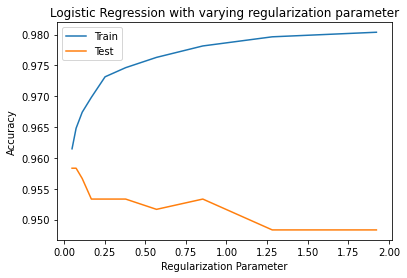

In [243]:
print("Accuracy on training set")
print("\tMin accuracy is %f with regularization parameter of %f" % (min(train_reg.values()),list(train_reg.keys())[list(train_reg.values()).index(min(train_reg.values()))]))
print("\tMax accuracy is %f with regularization parameter of %f" % (max(train_reg.values()),list(train_reg.keys())[list(train_reg.values()).index(max(train_reg.values()))]))
print("\tAverage accuracy:", sum(list(train_reg.values()))/len(list(train_reg.values())))

print("\nAccuracy on validation set")
print("\tMin accuracy is %f with regularization parameter of %f" % (min(validation_reg.values()),list(validation_reg.keys())[list(validation_reg.values()).index(min(validation_reg.values()))]))
print("\tMax accuracy is %f with regularization parameter of %f" % (max(validation_reg.values()),list(validation_reg.keys())[list(validation_reg.values()).index(max(validation_reg.values()))]))
print("\tAverage accuracy:", sum(list(validation_reg.values()))/len(list(validation_reg.values())))

plt.title("Logistic Regression with varying regularization parameter")
plt.xlabel("Regularization Parameter")
plt.ylabel("Accuracy")
plt.plot(list(train_reg.keys()),list(train_reg.values()))   
plt.plot(list(validation_reg.keys()),list(validation_reg.values()))   
plt.legend(["Train","Test"])
plt.show()

## Training full dataset with optimal regularization parameter for Logistic Regression

In [245]:
regularization_param = list(validation_reg.keys())[list(validation_reg.values()).index(max(validation_reg.values()))]
print(regularization_param)
clf2 = LogisticRegression(max_iter=100000,C=regularization_param,penalty='l2',multi_class='multinomial').fit(new_X_train, new_y_train)
print("Trainign accuracy %f" % clf2.score(new_X_train, new_y_train))
print("Testing accuracy %f" % clf2.score(new_X_test, new_y_test))


0.05
Trainign accuracy 0.962667
Testing accuracy 0.960000


## K-Fold for SVM
### Finidng the best regularization parameter

In [246]:
def Vector_Machine_new(train_x,train_y,test_x,test_y,train_svm,validation_svm,regularization):
    vec_machine = svm.SVC(kernel='linear',C=regularization)
    vec_machine.fit(train_x,train_y)

    train_svm[regularization] = vec_machine.score(train_x,train_y)
    validation_svm[regularization] = vec_machine.score(test_x,test_y)

validation = random.choice(range(1,11))
train_x,train_y,test_x,test_y = formulate_new_data(validation-1)

c0 = 0.01
alpha = 1.5
logarithmic_regularization = []
for alpha_exponent in range(10):
    r = (alpha ** alpha_exponent) * c0
    logarithmic_regularization.append(r)

# # C0 = 0.05, alpha = 1.5
# logarithmic_regularization = [0.05,0.07500000000000001,0.1125,0.16875,0.253125,0.3796875,0.56953125,
#                             0.8542968750000001,1.2814453125,1.9221679687500002] 
train_svm,validation_svm = {},{}
for item in logarithmic_regularization:
    Vector_Machine_new(train_x,train_y,test_x,test_y,train_svm,validation_svm,item)

Accuracy on training set
	Min accuracy is 0.954630 with regularization parameter of 0.010000
	Max accuracy is 0.978704 with regularization parameter of 0.384434
	Average accuracy: 0.9679814814814816

Accuracy on validation set
	Min accuracy is 0.946667 with regularization parameter of 0.010000
	Max accuracy is 0.956667 with regularization parameter of 0.050625
	Average accuracy: 0.9496666666666668


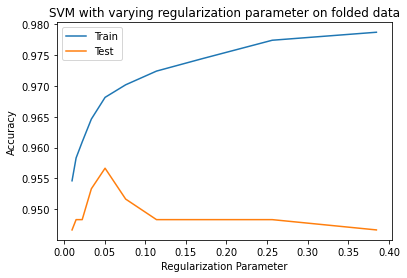

In [247]:
print("Accuracy on training set")
print("\tMin accuracy is %f with regularization parameter of %f" % (min(train_svm.values()),list(train_svm.keys())[list(train_svm.values()).index(min(train_svm.values()))]))
print("\tMax accuracy is %f with regularization parameter of %f" % (max(train_svm.values()),list(train_svm.keys())[list(train_svm.values()).index(max(train_svm.values()))]))
print("\tAverage accuracy:", sum(list(train_svm.values()))/len(list(train_svm.values())))

print("\nAccuracy on validation set")
print("\tMin accuracy is %f with regularization parameter of %f" % (min(validation_svm.values()),list(validation_svm.keys())[list(validation_svm.values()).index(min(validation_svm.values()))]))
print("\tMax accuracy is %f with regularization parameter of %f" % (max(validation_svm.values()),list(validation_svm.keys())[list(validation_svm.values()).index(max(validation_svm.values()))]))
print("\tAverage accuracy:", sum(list(validation_svm.values()))/len(list(validation_svm.values())))

plt.title("SVM with varying regularization parameter on folded data")
plt.xlabel("Regularization Parameter")
plt.ylabel("Accuracy")
plt.plot(list(train_svm.keys()),list(train_svm.values()))   
plt.plot(list(validation_svm.keys()),list(validation_svm.values()))   
plt.legend(["Train","Test"])
plt.show()

## Training full dataset with optimal regularization parameter for SVM

In [248]:
regularization_param = list(validation_svm.keys())[list(validation_svm.values()).index(max(validation_svm.values()))]
print(regularization_param)
vec_machine = svm.SVC(kernel='linear',C=regularization_param)
vec_machine.fit(new_X_train, new_y_train)
print("Trainign accuracy %f" % vec_machine.score(new_X_train, new_y_train))
print("Testing accuracy %f" % vec_machine.score(new_X_test, new_y_test))


0.050625
Trainign accuracy 0.967667
Testing accuracy 0.959000


## Kernelized SVM with Gaussian Kernel 

In [249]:
def svm_gaussian(train_x,train_y,test_x,test_y,scale,regularization,valid_gaus):
    vec_machine = svm.SVC(kernel='rbf',C=regularization,gamma=scale)
    vec_machine.fit(train_x,train_y)
    valid_gaus[(scale,regularization)] = vec_machine.score(test_x,test_y)

c0 = 0.01
alpha = 1.5
gammas = []
for alpha_exponent in range(10):
    gamma = (alpha ** alpha_exponent) * c0
    gammas.append(gamma)

logarithmic_regularization = [0.05,0.07500000000000001,0.1125,0.16875,0.253125,0.3796875,0.56953125,
                            0.8542968750000001,1.2814453125,1.9221679687500002] 
optimal_pairs = {}
for item in gammas:
    valid_gaus = {}
    validation = random.choice(range(1,11))
    train_x,train_y,test_x,test_y = formulate_new_data(validation-1)
    for item2 in logarithmic_regularization:
        svm_gaussian(train_x,train_y,test_x,test_y,item,item2,valid_gaus)
    max_pair = list(valid_gaus.keys())[list(valid_gaus.values()).index(max(valid_gaus.values()))]
    max_acc = max(list(valid_gaus.values()))
    optimal_pairs[max_pair] = max_acc



In [228]:
def SVM(scale,regularization,train_acc,test_acc):
    sv = svm.SVC(kernel='rbf',gamma=scale,C=regularization)
    sv.fit(new_X_train,new_y_train)

    train_acc[(scale,regularization)] = sv.score(new_X_train,new_y_train)
    test_acc[(scale,regularization)] = sv.score(new_X_test,new_y_test)

train_acc,test_acc = {},{}
for item in optimal_pairs.keys():
    scale = item[0]
    regularization = item[1]
    SVM(scale,regularization,train_acc,test_acc)

# print(len(train_acc),len(test_acc))


10 10


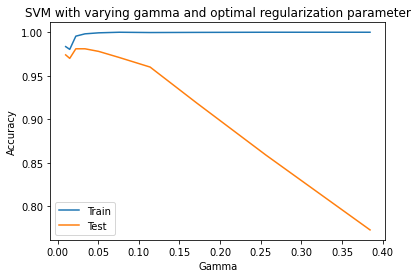

In [252]:
plt.title("SVM with varying gamma and optimal regularization parameter")
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
x_axis_train = [a_tuple[0] for a_tuple in list(train_acc.keys())]
x_axis_test = [a_tuple[0] for a_tuple in list(test_acc.keys())]
plt.plot(x_axis_train,list(train_acc.values()))  
plt.plot(x_axis_test,list(test_acc.values()))   
plt.legend(["Train","Test"])
plt.show()